# Cricket workflow

In [1]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

In [2]:
class cricketstate(TypedDict):
    runs: int
    balls: int
    fours: int
    sixes: int

    sr: float
    boundries_per: float
    bpb: float
    summary: str

# define graph

In [3]:
graph=StateGraph(cricketstate)

In [4]:
def strick_rate(state:cricketstate):
    runs=state['runs']
    balls=state['balls']
    sr=(runs/balls)*100
    # state['sr']=sr
    return {'sr': sr}

In [5]:
def bpb_per(state:cricketstate):
    bpb=state['balls']/(state['fours']+state['sixes'])
    return {'bpb':bpb}

In [6]:
def baundries_per(state:cricketstate):
    baundries_per=((state['fours']*4)+(state['sixes']*6)/state['runs'])*100
    #state['boundries_per']=baundries_per
    return {'boundries_per':baundries_per}


In [7]:
def summary(state:cricketstate):
    summary=f'''
    strick_rate: {state["sr"]} \n
    balls per boundries: {state['bpb']} \n
    boundries_per: {state["boundries_per"]}
'''
    #state["summary"]=summary
    return {'summary':summary}

# creating nodes

In [8]:
graph.add_node("strick_rate",strick_rate)
graph.add_node("baundries_per",baundries_per)
graph.add_node("bpb_per",bpb_per)# balls per boundries
graph.add_node("summary",summary)

# connecting nodes with edges

In [9]:
graph.add_edge(START,"strick_rate")
graph.add_edge(START,"bpb_per")
graph.add_edge(START,"baundries_per")
graph.add_edge("strick_rate","summary")
graph.add_edge("baundries_per","summary")
graph.add_edge("bpb_per","summary")
graph.add_edge("summary",END)

In [10]:
cricket_workflow=graph.compile()

# Print graph as text

In [11]:
print(cricket_workflow.get_graph().draw_mermaid())

---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	strick_rate(strick_rate)
	baundries_per(baundries_per)
	bpb_per(bpb_per)
	summary(summary)
	__end__([<p>__end__</p>]):::last
	__start__ --> baundries_per;
	__start__ --> bpb_per;
	__start__ --> strick_rate;
	baundries_per --> summary;
	bpb_per --> summary;
	strick_rate --> summary;
	summary --> __end__;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc



In [12]:
inputs={'runs':100, 'balls':85,'fours':4,'sixes':7}
cricket_workflow.invoke(inputs)

{'runs': 100,
 'balls': 85,
 'fours': 4,
 'sixes': 7,
 'sr': 117.64705882352942,
 'boundries_per': 1642.0000000000002,
 'bpb': 7.7272727272727275,
 'summary': '\n    strick_rate: 117.64705882352942 \n\n    balls per boundries: 7.7272727272727275 \n\n    boundries_per: 1642.0000000000002\n'}

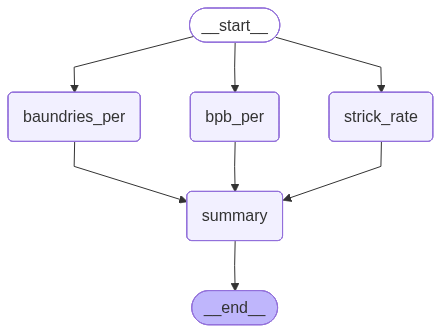

In [13]:
# display langraph workflow
from IPython.display import Image
Image(cricket_workflow.get_graph().draw_mermaid_png())

In [14]:
from langchain_core.runnables.graph import MermaidDrawMethod
from IPython.display import Image, display

# render to PNG bytes using a local headless browser
img_bytes = cricket_workflow.get_graph().draw_mermaid_png(
    draw_method=MermaidDrawMethod.PYPPETEER
)
display(Image(data=img_bytes))

RuntimeError: asyncio.run() cannot be called from a running event loop